In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '148c643d-e432-4a31-8ffc-99bbbe8ba5ee',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)



{'status': {'timestamp': '2024-12-28T03:20:16.685Z', 'error_code': 0, 'error_message': None, 'elapsed': 17, 'credit_count': 1, 'notice': None, 'total_count': 10478}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11853, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11853,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.980212e+07,1.980212e+07,False,NaN,1,None,None,None,2024-12-28T03:18:00.000Z,94443.630550,5.055310e+10,10.2913,0.081849,-1.728195,-2.954592,-1.130564,32.451657,43.682569,1.870184e+12,56.8472,1.983316e+12,None,2024-12-28T03:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-27 21:20:29.004668
1,1027,Ethereum,ETH,ethereum,9743,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204665e+08,1.204665e+08,True,NaN,2,None,None,None,2024-12-28T03:18:00.000Z,3334.656424,2.308784e+10,2.3091,0.005593,-0.781629,-3.807036,-7.421254,27.477513,24.972122,4.017145e+11,12.2102,4.017145e+11,None,2024-12-28T03:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-27 21:20:29.004668
2,825,Tether USDt,USDT,tether,110316,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.390051e+11,1.434401e+11,True,NaN,3,None,None,None,2024-12-28T03:18:00.000Z,0.998473,1.062067e+11,4.2856,-0.012988,-0.022235,-0.117320,-0.238014,-0.057361,-0.157252,1.387928e+11,4.2203,1.432211e+11,None,2024-12-28T03:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-27 21:20:29.004668
3,52,XRP,XRP,xrp,1490,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.741023e+10,9.998674e+10,False,NaN,4,None,None,None,2024-12-28T03:18:00.000Z,2.146142,5.041031e+09,-10.6737,-0.220911,-0.857721,-5.778760,46.873658,310.078651,252.505141,1.232105e+11,3.7450,2.146142e+11,None,2024-12-28T03:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-27 21:20:29.004668
4,1839,BNB,BNB,bnb,2318,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440073e+08,1.440073e+08,False,NaN,5,None,None,None,2024-12-28T03:18:00.000Z,694.846616,1.840505e+09,46.7406,-0.148238,0.783581,2.019542,6.928961,14.373070,15.969184,1.000630e+11,3.0416,1.000630e+11,None,2024-12-28T03:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-27 21:20:29.004668
5,5426,Solana,SOL,solana,816,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.796442e+08,5.910728e+08,True,NaN,6,None,None,None,2024-12-28T03:18:00.000Z,184.603739,2.720805e+09,-2.3575,-0.333999,-2.259875,-4.815469,-23.429023,2.268571,17.371007,8.854412e+10,2.6913,1.091143e+11,None,2024-12-28T03:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-27 21:20:29.004668
6,74,Dogecoin,DOGE,dogecoin,1135,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.473825e+11,1.473825e+11,True,NaN,7,None,None,None,2024-12-28T03:18:00.000Z,0.314453,2.084866e+09,-14.6179,0.267721,0.158158,-3.007073,-23.114690,88.784988,143.903611,4.634485e+10,1.4092,4.634485e+10,None,2024-12-28T03:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-27 21:20:29.004668
7,3408,USDC,USDC,usd-coin,24215,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.355802e+10,4.355802e+10,False,NaN,8,None,None,None,2024-12-28T03:18:00.000Z,0.999934,6.803252e+09,11.7618,-0.014621,-0.012657,-0.017218,0.005461,0.004029,0.005762,4.355516e+10,1.3239,4.355516e+10,None,2024-12-28T03:18:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-12-27 21:20:29.004668
8,2010,Cardano,ADA,cardano,1421,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-cont

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '148c643d-e432-4a31-8ffc-99bbbe8ba5ee',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df,df_append])



    # Use this if you want to create a csv and append data to it
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df

    #if not os.path.isfile(r'C:\Users\alish\Desktop\Alex\API.csv'):
        #df.to_csv(r'C:\Users\alexf\OneDrive\Documents\Python Scripts\API.csv', header='column_names')
    #else:
        #df.to_csv(r'C:\Users\alish\Desktop\Alex\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\alish\Desktop\Alex\API.csv')

# If that didn't work try using the local host URL as shown in the video

In [8]:
import os 
from time import time
from time import sleep
for i in range(333):
    api_runner()
    print('API Runner completed',  flush=True)
    sleep(60) #sleep for 1 minute

{'status': {'timestamp': '2024-12-28T03:45:30.036Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 10478}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11853, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

KeyboardInterrupt: 

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11853,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.980212e+07,1.980212e+07,False,NaN,1,None,None,None,2024-12-28T03:30:00.000Z,94458.381836,5.042965e+10,10.0539,0.075404,-1.695712,-2.974979,-0.698191,32.727193,43.503237,1.870476e+12,56.8385,1.983626e+12,None,2024-12-28T03:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-27 21:32:34.775552
1,1027,Ethereum,ETH,ethereum,9743,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204665e+08,1.204665e+08,True,NaN,2,None,None,None,2024-12-28T03:30:00.000Z,3335.581124,2.303993e+10,2.0106,0.016241,-0.915930,-3.657170,-6.953038,27.659825,24.744282,4.018259e+11,12.2098,4.018259e+11,None,2024-12-28T03:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-27 21:32:34.775552
2,825,Tether USDt,USDT,tether,110316,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.390051e+11,1.434401e+11,True,NaN,3,None,None,None,2024-12-28T03:31:00.000Z,0.998493,1.059466e+11,4.1273,-0.006949,-0.014128,-0.106523,-0.251652,-0.053100,-0.177686,1.387956e+11,4.2168,1.432240e+11,None,2024-12-28T03:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-27 21:32:34.775552
3,52,XRP,XRP,xrp,1490,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.741023e+10,9.998674e+10,False,NaN,4,None,None,None,2024-12-28T03:31:00.000Z,2.148947,5.039950e+09,-10.8175,-0.012689,-0.813929,-5.656467,48.042063,310.679383,251.678458,1.233715e+11,3.7487,2.148947e+11,None,2024-12-28T03:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-27 21:32:34.775552
4,1839,BNB,BNB,bnb,2318,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440073e+08,1.440073e+08,False,NaN,5,None,None,None,2024-12-28T03:31:00.000Z,694.815920,1.838079e+09,46.4768,-0.126371,0.840596,2.148180,7.262094,14.475826,15.758585,1.000585e+11,3.0398,1.000585e+11,None,2024-12-28T03:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-27 21:32:34.775552
5,5426,Solana,SOL,solana,816,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.796442e+08,5.910728e+08,True,NaN,6,None,None,None,2024-12-28T03:31:00.000Z,184.780676,2.716669e+09,-2.1999,-0.095512,-2.227463,-4.822509,-22.857387,2.011647,17.325270,8.862899e+10,2.6931,1.092188e+11,None,2024-12-28T03:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-27 21:32:34.775552
6,74,Dogecoin,DOGE,dogecoin,1135,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.473825e+11,1.473825e+11,True,NaN,7,None,None,None,2024-12-28T03:31:00.000Z,0.314460,2.085086e+09,-14.4966,0.295355,0.111114,-3.008886,-22.566784,88.244435,143.571993,4.634590e+10,1.4081,4.634590e+10,None,2024-12-28T03:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-27 21:32:34.775552
7,3408,USDC,USDC,usd-coin,24215,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.355802e+10,4.355802e+10,False,NaN,8,None,None,None,2024-12-28T03:30:00.000Z,0.999940,6.791318e+09,11.7316,-0.009265,-0.007710,-0.022028,-0.003048,0.016424,0.003548,4.355541e+10,1.3235,4.355541e+10,None,2024-12-28T03:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-12-27 21:32:34.775552
8,2010,Cardano,ADA,cardano,1421,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-con

In [11]:
# One thing I noticed was the scientific notation. I like it, but I want to be able to see the numbers in this case

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [12]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,1,Bitcoin,BTC,bitcoin,11853,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19802118.00000,19802118.00000,False,NaN,1,None,None,None,2024-12-28T03:30:00.000Z,94458.38184,50429650715.97350,10.05390,0.07540,-1.69571,-2.97498,-0.69819,32.72719,43.50324,1870476023211.22217,56.83850,1983626018562.04004,None,2024-12-28T03:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-27 21:32:34.775552
1,1027,Ethereum,ETH,ethereum,9743,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120466523.43772,120466523.43772,True,NaN,2,None,None,None,2024-12-28T03:30:00.000Z,3335.58112,23039929201.29947,2.01060,0.01624,-0.91593,-3.65717,-6.95304,27.65982,24.74428,401825861593.06921,12.20980,401825861593.07001,None,2024-12-28T03:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-27 21:32:34.775552
2,825,Tether USDt,USDT,tether,110316,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,139005076782.30908,143440125281.65012,True,NaN,3,None,None,None,2024-12-28T03:31:00.000Z,0.99849,105946587385.47740,4.12730,-0.00695,-0.01413,-0.10652,-0.25165,-0.05310,-0.17769,138795599054.25153,4.21680,143223964028.75000,None,2024-12-28T03:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-27 21:32:34.775552
3,52,XRP,XRP,xrp,1490,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,57410227039.00000,99986740020.00000,False,NaN,4,None,None,None,2024-12-28T03:31:00.000Z,2.14895,5039950425.76322,-10.81750,-0.01269,-0.81393,-5.65647,48.04206,310.67938,251.67846,123371522929.98019,3.74870,214894678688.82001,None,2024-12-28T03:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-27 21:32:34.775552
4,1839,BNB,BNB,bnb,2318,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,144007276.21000,144007276.21000,False,NaN,5,None,None,None,2024-12-28T03:31:00.000Z,694.81592,1838079092.85454,46.47680,-0.12637,0.84060,2.14818,7.26209,14.47583,15.75858,100058548109.55928,3.03980,100058548109.56000,None,2024-12-28T03:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-27 21:32:34.775552
5,5426,Solana,SOL,solana,816,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,479644228.83504,591072834.93965,True,NaN,6,None,None,None,2024-12-28T03:31:00.000Z,184.78068,2716668977.10251,-2.19990,-0.09551,-2.22746,-4.82251,-22.85739,2.01165,17.32527,88628985063.18787,2.69310,109218838275.94000,None,2024-12-28T03:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-27 21:32:34.775552
6,74,Dogecoin,DOGE,dogecoin,1135,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147382476383.70517,147382476383.70517,True,NaN,7,None,None,None,2024-12-28T03:31:00.000Z,0.31446,2085085978.68757,-14.49660,0.29536,0.11111,-3.00889,-22.56678,88.24443,143.57199,46345901961.18388,1.40810,46345901961.18000,None,2024-12-28T03:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-27 21:32:34.775552
7,3408,USDC,USDC,usd-coin,24215,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,43558024460.26524,43558024460.26524,False,NaN,8,None,None,None,2024-12-28T03:30:00.000Z,0.99994,6791317715.57073,11.73160,-0.00927,-0.00771,-0.02203,-0.00305,0.01642,0.00355,43555407874.87602,1.32350,43555407874.88000,None,2024-12-28T03:30:00.000Z,1027.00000,Ethereum,ETH,ethereu

In [13]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.13467,-1.76226,-2.88479,-0.80482,33.01395,43.55131
Ethereum,0.24237,-0.96013,-3.44638,-7.04087,28.11413,24.84467
Tether USDt,0.02710,0.00205,-0.08798,-0.21312,-0.03960,-0.14553
XRP,0.16449,-0.98224,-5.46115,47.82519,311.23361,251.81585
BNB,0.01976,0.97501,2.30219,7.21960,14.83284,15.88558
Solana,0.29372,-2.10927,-4.50394,-22.78646,2.27470,17.45789
Dogecoin,0.23323,-0.18245,-2.79592,-22.75415,88.50810,143.46606
USDC,0.01137,0.00619,-0.01192,0.02086,0.01063,0.01336
Cardano,0.19009,0.41507,-7.53317,-12.52729,150.07604,118.27681


In [14]:
# we need data in rows to visualize
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.13467
             quote.USD.percent_change_24h    -1.76226
             quote.USD.percent_change_7d     -2.88479
             quote.USD.percent_change_30d    -0.80482
             quote.USD.percent_change_60d    33.01395
             quote.USD.percent_change_90d    43.55131
Ethereum     quote.USD.percent_change_1h      0.24237
             quote.USD.percent_change_24h    -0.96013
             quote.USD.percent_change_7d     -3.44638
             quote.USD.percent_change_30d    -7.04087
             quote.USD.percent_change_60d    28.11413
             quote.USD.percent_change_90d    24.84467
Tether USDt  quote.USD.percent_change_1h      0.02710
             quote.USD.percent_change_24h     0.00205
             quote.USD.percent_change_7d     -0.08798
             quote.USD.percent_change_30d    -0.21312
             quote.USD.percent_change_60d    -0.03960
             quote.USD.percent_change_90

In [15]:
type(df4)

pandas.core.series.Series

In [16]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.13467
            quote.USD.percent_change_24h  -1.76226
            quote.USD.percent_change_7d   -2.88479
            quote.USD.percent_change_30d  -0.80482
            quote.USD.percent_change_60d  33.01395
            quote.USD.percent_change_90d  43.55131
Ethereum    quote.USD.percent_change_1h    0.24237
            quote.USD.percent_change_24h  -0.96013
            quote.USD.percent_change_7d   -3.44638
            quote.USD.percent_change_30d  -7.04087
            quote.USD.percent_change_60d  28.11413
            quote.USD.percent_change_90d  24.84467
Tether USDt quote.USD.percent_change_1h    0.02710
            quote.USD.percent_change_24h   0.00205
            quote.USD.percent_change_7d   -0.08798
            quote.USD.percent_change_30d  -0.21312
            quote.USD.percent_change_60d  -0.03960
            quote.USD.percent_change_90d  -0.14553
XRP         quote.USD.percent_change_1h    0.16449
            quote.USD.percent_change_24h  -0.98224
            quote.USD.percent_change_7d   -5.46115
            quote.USD.percent_change_30d  47.82519
            quote.USD.percent_change_60d 311.23361
            quote.USD.percent_change_90d 251.81585
BNB         quote.USD.percent_change_1h    0.01976
            quote.USD.percent_change_24h   0.97501
            quote.USD.percent_change_7d    2.30219
            quote.USD.percent_change_30d   7.21960
            quote.USD.percent_change_60d  14.83284
            quote.USD.percent_change_90d  15.88558
Solana      quote.USD.percent_change_1h    0.29372
            quote.USD.percent_change_24h  -2.10927
            quote.USD.percent_change_7d   -4.50394
            quote.USD.percent_change_30d -22.78646
            quote.USD.percent_change_60d   2.27470
            quote.USD.percent_change_90d  17.45789
Dogecoin    quote.USD.percent_change_1h    0.23323
            quote.USD.percent_change_24h  -0.18245
            quote.USD.percent_change_7d   -2.79592
            quote.USD.percent_change_30d -22.75415
            quote.USD.percent_change_60d  88.50810
            quote.USD.percent_change_90d 143.46606
USDC        quote.USD.percent_change_1h    0.01137
            quote.USD.percent_change_24h   0.00619
            quote.USD.percent_change_7d   -0.01192
            quote.USD.percent_change_30d   0.02086
            quote.USD.percent_change_60d   0.01063
            quote.USD.percent_change_90d   0.01336
Cardano     quote.USD.percent_change_1h    0.19009
            quote.USD.percent_change_24h   0.41507
            quote.USD.percent_change_7d   -7.53317
            quote.USD.percent_change_30d -12.52729
            quote.USD.percent_change_60d 150.07604
            quote.USD.percent_change_90d 118.27681
TRON        quote.USD.percent_change_1h    0.09843
            quote.USD.percent_change_24h   2.19532
            quote.USD.percent_change_7d    5.14566
            quote.USD.percent_change_30d  30.79430
            quote.USD.percent_change_60d  59.01804
            quote.USD.percent_change_90d  68.44274
Avalanche   quote.USD.percent_change_1h    0.24336
            quote.USD.percent_change_24h  -2.24449
            quote.USD.percent_change_7d   -7.58222
            quote.USD.percent_change_30d -14.58634
            quote.USD.percent_change_60d  36.81157
            quote.USD.percent_change_90d  25.69739
Toncoin     quote.USD.percent_change_1h   -0.07178
            quote.USD.percent_change_24h  -0.52717
            quote.USD.percent_change_7d    4.30034
            quote.USD.percent_change_30d  -9.17293
            quote.USD.percent_change_60d  13.49954
            quote.USD.percent_change_90d  -2.19035
Chainlink   quote.USD.percent_change_1h    0.29084
            quote.USD.percent_change_24h  -6.70847
            quote.USD.percent_change_7d   -7.42033
            quote.USD.percent_change_30d  18.99795
            quote.USD.percent_change_60d  87.46649
            quo

In [17]:
df5.count()

values    90
dtype: int64

In [21]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe.


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values we can use reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.13467
1,Bitcoin,quote.USD.percent_change_24h,-1.76226
2,Bitcoin,quote.USD.percent_change_7d,-2.88479
3,Bitcoin,quote.USD.percent_change_30d,-0.80482
4,Bitcoin,quote.USD.percent_change_60d,33.01395
5,Bitcoin,quote.USD.percent_change_90d,43.55131
6,Ethereum,quote.USD.percent_change_1h,0.24237
7,Ethereum,quote.USD.percent_change_24h,-0.96013
8,Ethereum,quote.USD.percent_change_7d,-3.44638
9,Ethereum,quote.USD.percent_change_30d,-7.04087


In [22]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.13467
1,Bitcoin,quote.USD.percent_change_24h,-1.76226
2,Bitcoin,quote.USD.percent_change_7d,-2.88479
3,Bitcoin,quote.USD.percent_change_30d,-0.80482
4,Bitcoin,quote.USD.percent_change_60d,33.01395
5,Bitcoin,quote.USD.percent_change_90d,43.55131
6,Ethereum,quote.USD.percent_change_1h,0.24237
7,Ethereum,quote.USD.percent_change_24h,-0.96013
8,Ethereum,quote.USD.percent_change_7d,-3.44638
9,Ethereum,quote.USD.percent_change_30d,-7.04087


In [24]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.13467
1,Bitcoin,24h,-1.76226
2,Bitcoin,7d,-2.88479
3,Bitcoin,30d,-0.80482
4,Bitcoin,60d,33.01395
5,Bitcoin,90d,43.55131
6,Ethereum,1h,0.24237
7,Ethereum,24h,-0.96013
8,Ethereum,7d,-3.44638
9,Ethereum,30d,-7.04087


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

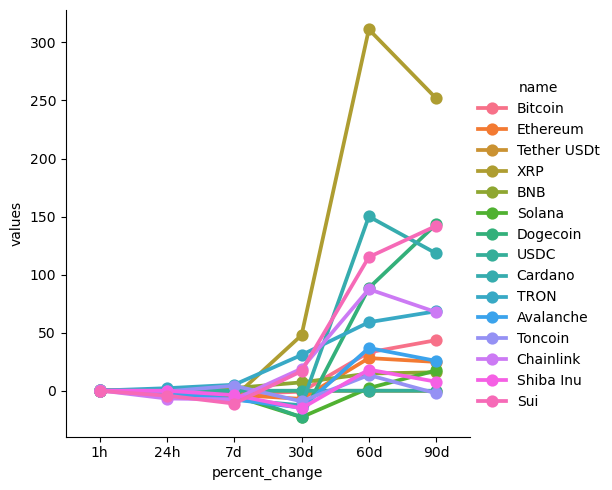

In [26]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [28]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','Timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,94458.38184,2024-12-27 21:32:34.775552
0,Bitcoin,94534.58231,2024-12-27 21:45:32.159978
0,Bitcoin,94480.54818,2024-12-27 21:46:32.651596
0,Bitcoin,94480.54818,2024-12-27 21:47:32.887979


<Axes: xlabel='Timestamp', ylabel='quote.USD.price'>

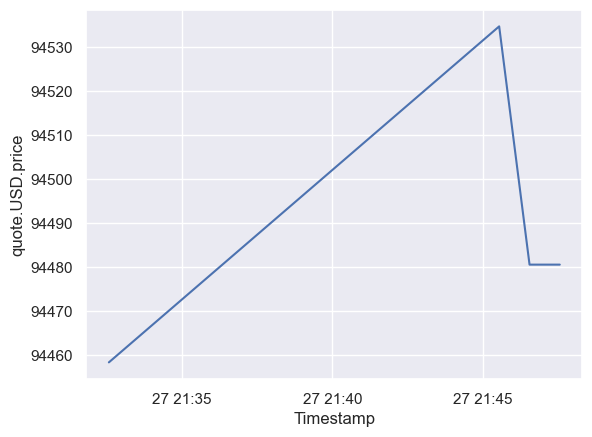

In [30]:
sns.set_theme(style="darkgrid")

sns.lineplot(x='Timestamp', y='quote.USD.price', data = df10)